<a href="https://colab.research.google.com/github/vardhan307/Forecasting-Cryptocurrency-Prices-Using-Time-Series-and-News-Sentiment-Analysis-/blob/main/Finalprojectvardhanvvs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
!pip install pmdarima
!pip install tensorflow
!pip install pandas numpy matplotlib seaborn plotly scikit-learn
!pip install --upgrade scikit-learn

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler

import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR



In [130]:
btc = pd.read_csv('/content/btc_10yrs.csv')


In [131]:
btc.info()

btc.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      3701 non-null   object
 1   Adj Close  3700 non-null   object
 2   Close      3700 non-null   object
 3   High       3700 non-null   object
 4   Low        3700 non-null   object
 5   Open       3700 non-null   object
 6   Volume     3700 non-null   object
dtypes: object(7)
memory usage: 202.5+ KB


,Price,Adj Close,Close,High,Low,Open,Volume
count,3701,3700,3700,3700,3700,3700,3700
unique,3701,3697,3697,3697,3698,3696,3700
top,2024-11-01 00:00:00+00:00,6741.75,6741.75,244.25100708007812,27375.6015625,17760.30078125,46855045120
freq,1,2,2,2,2,2,1


In [132]:
btc.head(5)

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-09-17 00:00:00+00:00,457.3340148925781,457.3340148925781,468.17401123046875,452.4219970703125,465.864013671875,21056800
3,2014-09-18 00:00:00+00:00,424.44000244140625,424.44000244140625,456.8599853515625,413.10400390625,456.8599853515625,34483200
4,2014-09-19 00:00:00+00:00,394.7959899902344,394.7959899902344,427.8349914550781,384.5320129394531,424.1029968261719,37919700


In [133]:
btc.isna()
btc.dropna()
btc.reset_index(drop = True,inplace = True)
btc

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-09-17 00:00:00+00:00,457.3340148925781,457.3340148925781,468.17401123046875,452.4219970703125,465.864013671875,21056800
3,2014-09-18 00:00:00+00:00,424.44000244140625,424.44000244140625,456.8599853515625,413.10400390625,456.8599853515625,34483200
4,2014-09-19 00:00:00+00:00,394.7959899902344,394.7959899902344,427.8349914550781,384.5320129394531,424.1029968261719,37919700
...,...,...,...,...,...,...,...
3696,2024-10-28 00:00:00+00:00,69907.7578125,69907.7578125,70212.265625,67535.1328125,67922.671875,38799856657
3697,2024-10-29 00:00:00+00:00,72720.4921875,72720.4921875,73577.2109375,69729.9140625,69910.046875,58541874402
3698,2024-10-30 00:00:00+00:00,72339.5390625,72339.5390625,72905.296875,71411.734375,72715.3671875,40646637831
3699,2024-10-31 00:00:00+00:00,70215.1875,70215.1875,72662.3125,69590.5,72335.046875,40627912076


In [134]:
btc = btc.iloc[2:]

btc.reset_index(drop = True,inplace = True)
btc


,Price,Adj Close,Close,High,Low,Open,Volume
0,2014-09-17 00:00:00+00:00,457.3340148925781,457.3340148925781,468.17401123046875,452.4219970703125,465.864013671875,21056800
1,2014-09-18 00:00:00+00:00,424.44000244140625,424.44000244140625,456.8599853515625,413.10400390625,456.8599853515625,34483200
2,2014-09-19 00:00:00+00:00,394.7959899902344,394.7959899902344,427.8349914550781,384.5320129394531,424.1029968261719,37919700
3,2014-09-20 00:00:00+00:00,408.90399169921875,408.90399169921875,423.2959899902344,389.88299560546875,394.6730041503906,36863600
4,2014-09-21 00:00:00+00:00,398.8210144042969,398.8210144042969,412.4259948730469,393.1809997558594,408.0849914550781,26580100
...,...,...,...,...,...,...,...
3694,2024-10-28 00:00:00+00:00,69907.7578125,69907.7578125,70212.265625,67535.1328125,67922.671875,38799856657
3695,2024-10-29 00:00:00+00:00,72720.4921875,72720.4921875,73577.2109375,69729.9140625,69910.046875,58541874402
3696,2024-10-30 00:00:00+00:00,72339.5390625,72339.5390625,72905.296875,71411.734375,72715.3671875,40646637831
3697,2024-10-31 00:00:00+00:00,70215.1875,70215.1875,72662.3125,69590.5,72335.046875,40627912076


In [135]:
btc['profit'] = btc.apply(lambda x: 'Profit' if x['Close']>x['Open'] else 'Loss' ,axis=1)
btc[btc['profit'] == 'Profit']


btc.groupby('profit').count()

#renaming the column name from price to date
btc.rename(columns = {'Price':'Date'}, inplace = True)


#converting the columns to numeric whic is float in this data

btc['Date'] = pd.to_datetime(btc['Date'],errors = 'coerce')
btc['Close'] = btc['Close'].astype('float64')
btc['Open'] = btc['Open'].astype('float64')
btc['High'] = btc['High'].astype('float64')
btc['Low'] = btc['Low'].astype('float64')

btc['dif'] = btc['Close'] - btc['Open']
btc.head(6)
btc['dif'].max()
btc

<ipython-input-135-6d2221f61cdd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc['profit'] = btc.apply(lambda x: 'Profit' if x['Close']>x['Open'] else 'Loss' ,axis=1)
<ipython-input-135-6d2221f61cdd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc.rename(columns = {'Price':'Date'}, inplace = True)
<ipython-input-135-6d2221f61cdd>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,Date,Adj Close,Close,High,Low,Open,Volume,profit,dif
0,2014-09-17 00:00:00+00:00,457.3340148925781,457.334015,468.174011,452.421997,465.864014,21056800,Loss,-8.529999
1,2014-09-18 00:00:00+00:00,424.44000244140625,424.440002,456.859985,413.104004,456.859985,34483200,Loss,-32.419983
2,2014-09-19 00:00:00+00:00,394.7959899902344,394.795990,427.834991,384.532013,424.102997,37919700,Loss,-29.307007
3,2014-09-20 00:00:00+00:00,408.90399169921875,408.903992,423.295990,389.882996,394.673004,36863600,Profit,14.230988
4,2014-09-21 00:00:00+00:00,398.8210144042969,398.821014,412.425995,393.181000,408.084991,26580100,Loss,-9.263977
...,...,...,...,...,...,...,...,...,...
3694,2024-10-28 00:00:00+00:00,69907.7578125,69907.757812,70212.265625,67535.132812,67922.671875,38799856657,Profit,1985.085938
3695,2024-10-29 00:00:00+00:00,72720.4921875,72720.492188,73577.210938,69729.914062,69910.046875,58541874402,Profit,2810.445312
3696,2024-10-30 00:00:00+00:00,72339.5390625,72339.539062,72905.296875,71411.734375,72715.367188,40646637831,Loss,-375.828125
3697,2024-10-31 00:00:00+00:00,70215.1875,70215.187500,72662.312500,69590.500000,72335.046875,40627912076,Loss,-2119.859375


In [136]:
# Calculate the interquartile range (IQR) for 'Close'
Q1 = btc['Close'].quantile(0.25)
Q3 = btc['Close'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper limits for outlier detection
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
btc = btc[(btc['Close'] > lower_limit) & (btc['Close'] < upper_limit)]

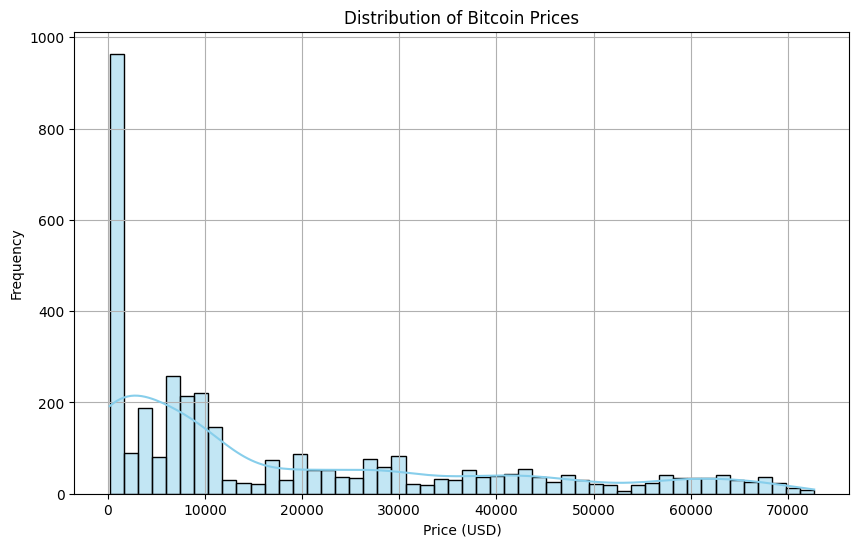

In [137]:
# Distribution of Bitcoin Prices
plt.figure(figsize=(10, 6))
sns.histplot(btc['Close'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Bitcoin Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


<ipython-input-138-31f84e1f6157>:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  btc['Month'] = pd.to_datetime(btc['Date'], utc=True).dt.to_period('M')  # Specify utc=True
<ipython-input-138-31f84e1f6157>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc['Month'] = pd.to_datetime(btc['Date'], utc=True).dt.to_period('M')  # Specify utc=True
<ipython-input-138-31f84e1f6157>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc['Date'] = btc['Date'].dt.tz_loca

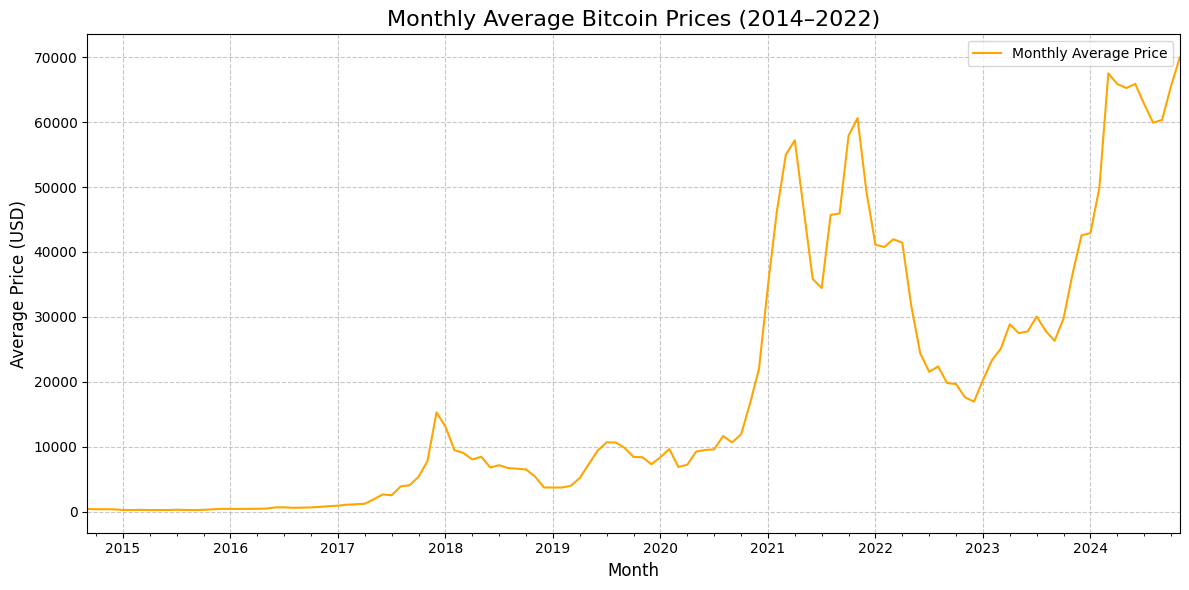

In [138]:
# 1. Handling timezone information (if necessary)

# Option 1: Keep timezone information (if important)
btc['Month'] = pd.to_datetime(btc['Date'], utc=True).dt.to_period('M')  # Specify utc=True

# Option 2: Explicitly remove timezone (if not needed)
btc['Date'] = btc['Date'].dt.tz_localize(None)  # Remove timezone before converting
btc['Month'] = btc['Date'].dt.to_period('M')

# 2. Avoiding SettingWithCopyWarning

# Use .loc for explicit assignment
btc.loc[:, 'Month'] = pd.to_datetime(btc['Date']).dt.to_period('M')  # Using .loc
monthly_avg = btc.groupby('Month')['Close'].mean()

plt.figure(figsize=(12, 6))
monthly_avg.plot(color='orange', label='Monthly Average Price')
plt.title('Monthly Average Bitcoin Prices (2014–2022)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Price (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()



<ipython-input-139-472f7e34b8ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc['Daily Change (%)'] = btc['Close'].pct_change() * 100


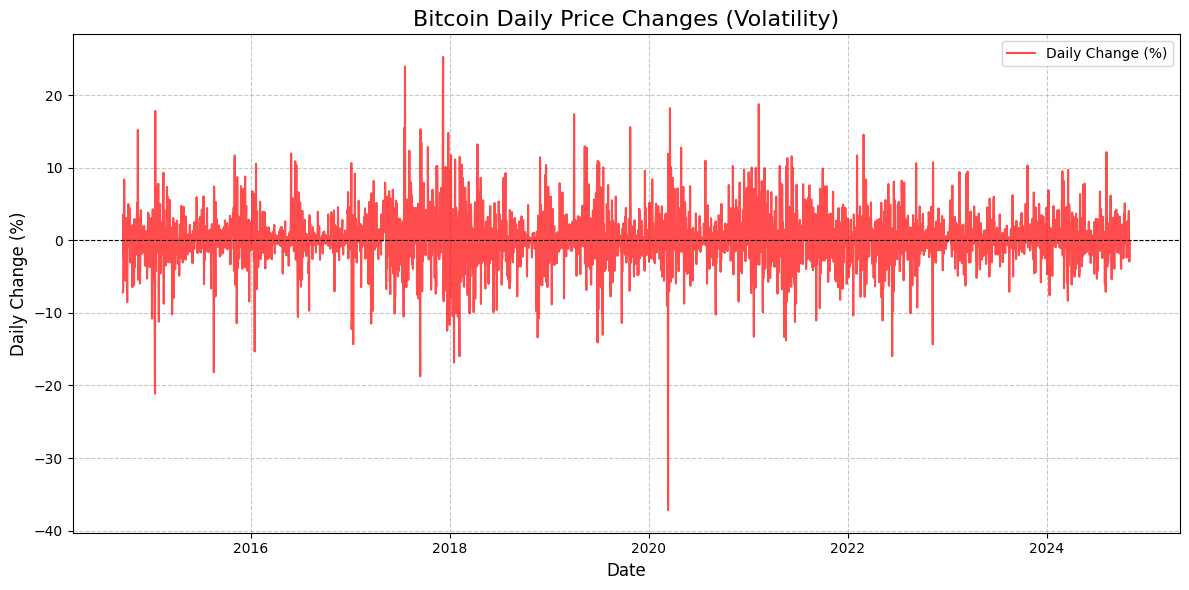

In [139]:
btc['Daily Change (%)'] = btc['Close'].pct_change() * 100

plt.figure(figsize=(12, 6))
plt.plot(btc['Date'], btc['Daily Change (%)'], color='red', alpha=0.7, label='Daily Change (%)')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.title('Bitcoin Daily Price Changes (Volatility)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Change (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


<ipython-input-140-148b238de139>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc['Date'] = pd.to_datetime(btc['Date'])
<ipython-input-140-148b238de139>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc['Daily Change (%)'] = btc['Close'].pct_change() * 100
<ipython-input-140-148b238de139>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

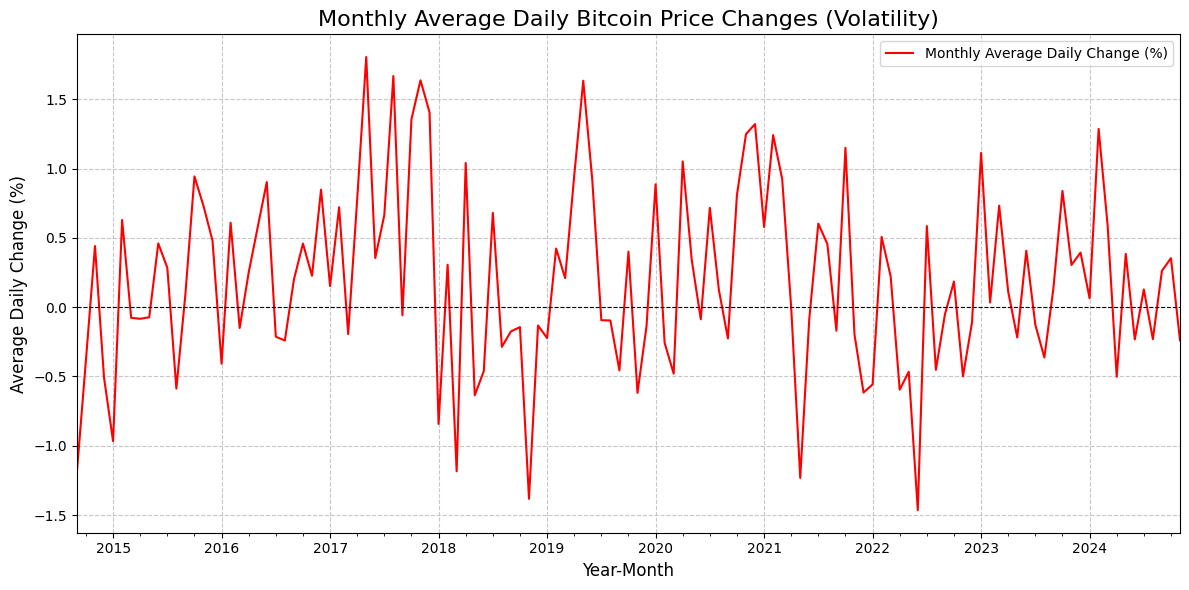

In [140]:
# Ensure Date is in datetime format
btc['Date'] = pd.to_datetime(btc['Date'])

# Calculate daily percentage change
btc['Daily Change (%)'] = btc['Close'].pct_change() * 100

# Group by month and calculate average daily change
btc['Year-Month'] = btc['Date'].dt.to_period('M')
monthly_volatility = btc.groupby('Year-Month')['Daily Change (%)'].mean()

# Plot the monthly average volatility
plt.figure(figsize=(12, 6))
monthly_volatility.plot(color='red', label='Monthly Average Daily Change (%)')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.title('Monthly Average Daily Bitcoin Price Changes (Volatility)', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Average Daily Change (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


<ipython-input-141-58929b30e8d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc['SMA50'] = btc['Close'].rolling(window=50).mean()
<ipython-input-141-58929b30e8d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc['SMA200'] = btc['Close'].rolling(window=200).mean()


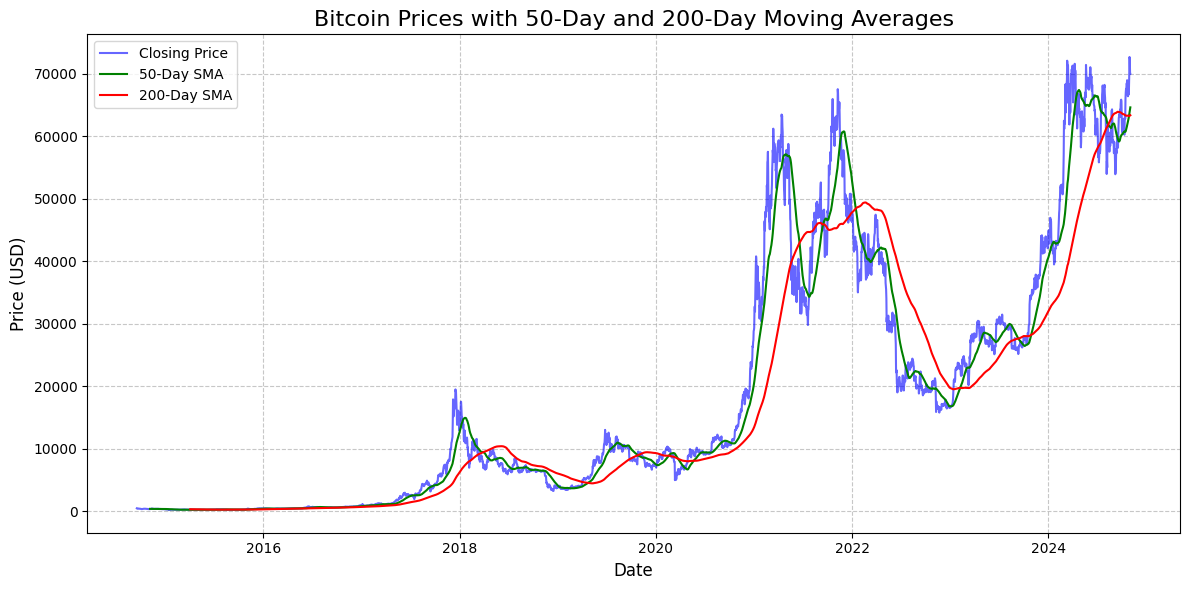

In [141]:
btc['SMA50'] = btc['Close'].rolling(window=50).mean()
btc['SMA200'] = btc['Close'].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
plt.plot(btc['Date'], btc['Close'], color='blue', alpha=0.6, label='Closing Price')
plt.plot(btc['Date'], btc['SMA50'], color='green', label='50-Day SMA')
plt.plot(btc['Date'], btc['SMA200'], color='red', label='200-Day SMA')
plt.title('Bitcoin Prices with 50-Day and 200-Day Moving Averages', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


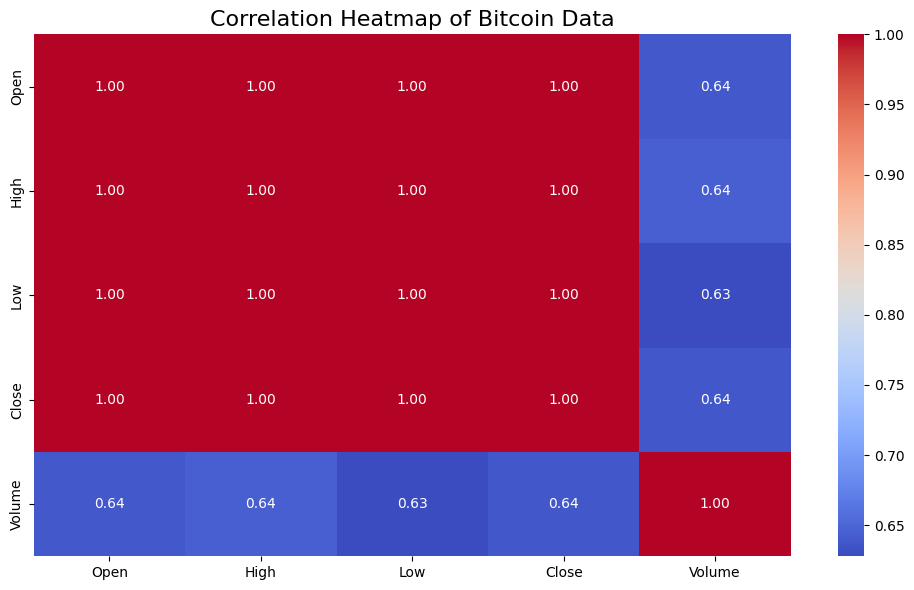

In [142]:
plt.figure(figsize=(10, 6))
sns.heatmap(btc[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Bitcoin Data', fontsize=16)
plt.tight_layout()
plt.show()


<ipython-input-143-aeb50c1f68b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc['Year'] = pd.to_datetime(btc['Date']).dt.year
<ipython-input-143-aeb50c1f68b5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Year', y='Close', data=btc, palette='viridis')


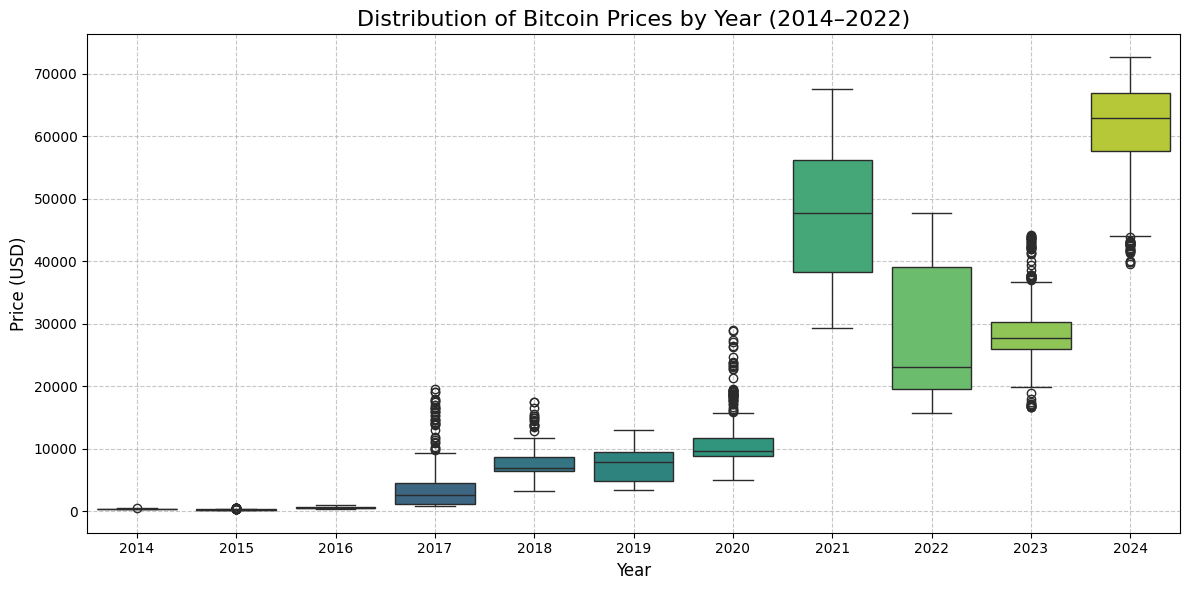

In [143]:
btc['Year'] = pd.to_datetime(btc['Date']).dt.year

plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Close', data=btc, palette='viridis')
plt.title('Distribution of Bitcoin Prices by Year (2014–2022)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


need to standardize the data to do this

In [144]:
# Assuming `btc` is your DataFrame and 'diff' is the column to process
scaler = StandardScaler()

# Standardize the 'diff' column
btc['Standardized_diff'] = scaler.fit_transform(btc[['dif']])

# Define bins and labels
bins = [-np.inf, -1.5, -0.5, 0.5, 1.5, np.inf]  # Adjust these values to reflect standardized data
labels = ['low Return', 'Below Avg Return', 'Avg Return', 'Abv Avg Return', 'High Return']

# Apply binning on the standardized 'diff'
btc['Count Category'] = pd.cut(btc['Standardized_diff'], bins, labels=labels)

# Group by Count Category and count
grouped_counts = btc.groupby('Count Category',observed = True).count()

# Display the results
print(grouped_counts.to_string(), end = "")

                  Date  Adj Close  Close  High   Low  Open  Volume  profit   dif  Month  Daily Change (%)  Year-Month  SMA50  SMA200  Year  Standardized_diff
Count Category                                                                                                                                               
low Return         170        170    170   170   170   170     170     170   170    170               170         170    170     170   170                170
Below Avg Return   297        297    297   297   297   297     297     297   297    297               297         297    297     297   297                297
Avg Return        2735       2735   2735  2735  2735  2735    2735    2735  2735   2735              2734        2735   2686    2536  2735               2735
Abv Avg Return     319        319    319   319   319   319     319     319   319    319               319         319    319     319   319                319
High Return        177        177    177   177   177

<ipython-input-144-ec5d1fc0aa3f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc['Standardized_diff'] = scaler.fit_transform(btc[['dif']])
<ipython-input-144-ec5d1fc0aa3f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc['Count Category'] = pd.cut(btc['Standardized_diff'], bins, labels=labels)


In [145]:
btc

,Date,Adj Close,Close,High,Low,Open,Volume,profit,dif,Month,Daily Change (%),Year-Month,SMA50,SMA200,Year,Standardized_diff,Count Category
0,2014-09-17,457.3340148925781,457.334015,468.174011,452.421997,465.864014,21056800,Loss,-8.529999,2014-09,NaN,2014-09,NaN,NaN,2014,-0.028803,Avg Return
1,2014-09-18,424.44000244140625,424.440002,456.859985,413.104004,456.859985,34483200,Loss,-32.419983,2014-09,-7.192558,2014-09,NaN,NaN,2014,-0.055554,Avg Return
2,2014-09-19,394.7959899902344,394.795990,427.834991,384.532013,424.102997,37919700,Loss,-29.307007,2014-09,-6.984265,2014-09,NaN,NaN,2014,-0.052069,Avg Return
3,2014-09-20,408.90399169921875,408.903992,423.295990,389.882996,394.673004,36863600,Profit,14.230988,2014-09,3.573492,2014-09,NaN,NaN,2014,-0.003316,Avg Return
4,2014-09-21,398.8210144042969,398.821014,412.425995,393.181000,408.084991,26580100,Loss,-9.263977,2014-09,-2.465854,2014-09,NaN,NaN,2014,-0.029625,Avg Return
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3694,2024-10-28,69907.7578125,69907.757812,70212.265625,67535.132812,67922.671875,38799856657,Profit,1985.085938,2024-10,2.912530,2024-10,63548.888594,63262.153320,2024,2.203571,High Return
3695,2024-10-29,72720.4921875,72720.492188,73577.210938,69729.914062,69910.046875,58541874402,Profit,2810.445312,2024-10,4.023494,2024-10,63862.907734,63289.776445,2024,3.127777,High Return
3696,2024-10-30,72339.5390625,72339.539062,72905.296875,71411.734375,72715.367188,40646637831,Loss,-375.828125,2024-10,-0.523859,2024-10,64156.724297,63332.366777,2024,-0.440090,Avg Return
3697,2024-10-31,70215.1875,70215.187500,72662.312500,69590.500000,72335.046875,40627912076,Loss,-2119.859375,2024-10,-2.936640,2024-10,64414.164609,63354.749082,2024,-2.392989,low Return


In [146]:
btc.dtypes

,0
Date,datetime64[ns]
Adj Close,object
Close,float64
High,float64
Low,float64
Open,float64
Volume,object
profit,object
dif,float64
Month,period[M]


In [147]:
#model

In [148]:
# Filter for dates between 2015 and 2020
btc5yrs = btc[(btc['Date'] >= '2015-01-01') & (btc['Date'] < '2020-01-01')]
btc5yrs.reset_index(drop = True,inplace = True)
btc5yrs.head()

,Date,Adj Close,Close,High,Low,Open,Volume,profit,dif,Month,Daily Change (%),Year-Month,SMA50,SMA200,Year,Standardized_diff,Count Category
0,2015-01-01,314.2489929199219,314.248993,320.434998,314.002991,320.434998,8036550,Loss,-6.186005,2015-01,-1.856380,2015-01,353.374738,NaN,2015,-0.026179,Avg Return
1,2015-01-02,315.0320129394531,315.032013,315.838989,313.565002,314.079010,7860650,Profit,0.953003,2015-01,0.249172,2015-01,351.260679,NaN,2015,-0.018185,Avg Return
2,2015-01-03,281.0820007324219,281.082001,315.149994,281.082001,314.846008,33054400,Loss,-33.764008,2015-01,-10.776686,2015-01,348.925959,NaN,2015,-0.057059,Avg Return
3,2015-01-04,264.19500732421875,264.195007,287.230011,257.612000,281.145996,55629100,Loss,-16.950989,2015-01,-6.007853,2015-01,346.687199,NaN,2015,-0.038233,Avg Return
4,2015-01-05,274.4739990234375,274.473999,278.341003,265.084015,265.084015,43962800,Profit,9.389984,2015-01,3.890684,2015-01,344.419039,NaN,2015,-0.008737,Avg Return


In [149]:
btc_forecast = btc5yrs[['Date','Close','Open','High','Low']]
btc_forecast.reset_index(drop = True,inplace = True)
btc_forecast.head(5)

,Date,Close,Open,High,Low
0,2015-01-01,314.248993,320.434998,320.434998,314.002991
1,2015-01-02,315.032013,314.079010,315.838989,313.565002
2,2015-01-03,281.082001,314.846008,315.149994,281.082001
3,2015-01-04,264.195007,281.145996,287.230011,257.612000
4,2015-01-05,274.473999,265.084015,278.341003,265.084015


In [150]:
scaler = StandardScaler()
columns_to_standardize = ['Open', 'High', 'Low', 'Close']
scaler.fit(btc_forecast[columns_to_standardize])

StandardScaler()

In [151]:
btc_forecast.head(5)

,Date,Close,Open,High,Low
0,2015-01-01,314.248993,320.434998,320.434998,314.002991
1,2015-01-02,315.032013,314.079010,315.838989,313.565002
2,2015-01-03,281.082001,314.846008,315.149994,281.082001
3,2015-01-04,264.195007,281.145996,287.230011,257.612000
4,2015-01-05,274.473999,265.084015,278.341003,265.084015


In [152]:
train_size = int(len(btc_forecast) * 0.8)
train_data = btc_forecast[:train_size]
test_data = btc_forecast[train_size:]

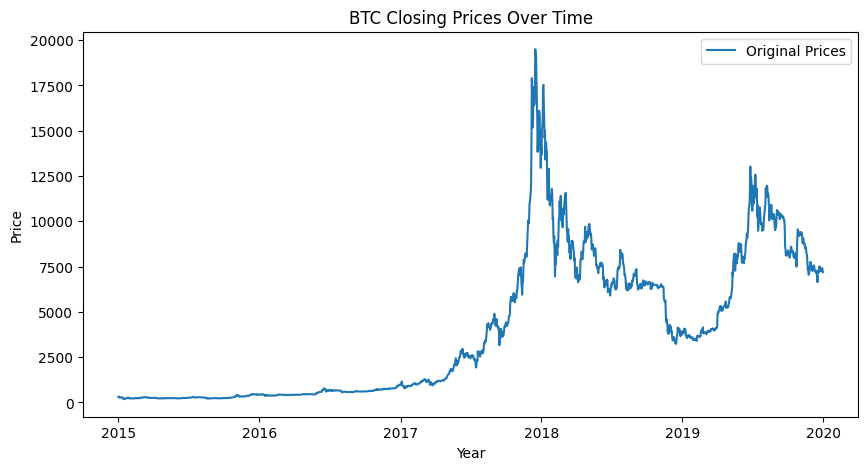

In [153]:
# Plot the original time series
plt.figure(figsize=(10, 5))
plt.plot(btc_forecast['Date'],btc_forecast['Close'], label='Original Prices')
plt.title('BTC Closing Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

check for stationary of time series


<Figure size 1200x600 with 0 Axes>

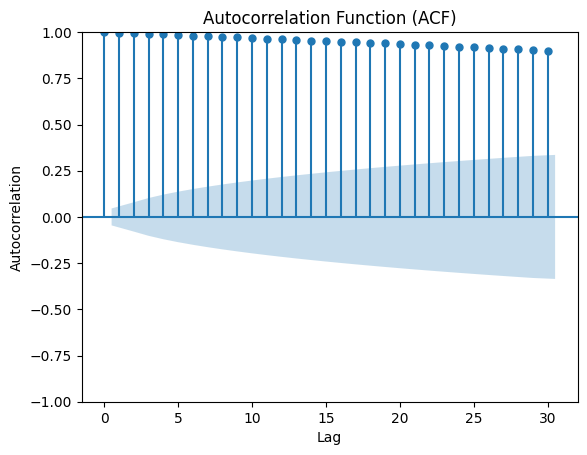

<Figure size 1200x600 with 0 Axes>

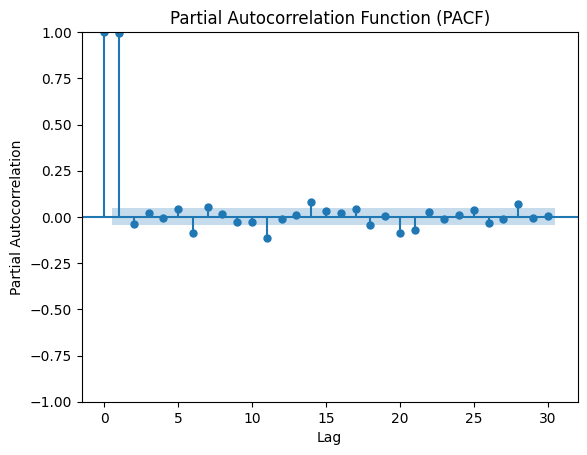

In [154]:
#plotting ACF and PACF after transforming
# 1. Plot the ACF
plt.figure(figsize=(12, 6))
plot_acf(btc_forecast['Close'], lags=30, alpha=0.05)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# 2. Plot the PACF
plt.figure(figsize=(12, 6))
plot_pacf(btc_forecast['Close'], lags=30, alpha=0.05)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

Transforming the data to stationary by differencing

In [155]:
import pandas as pd

def double_difference(data, column_name):
    """
    Apply double differencing to make a time series stationary.

    Parameters:
    - data (pd.DataFrame): DataFrame containing the time series.
    - column_name (str): The name of the column to be differenced.

    Returns:
    - pd.Series: The double differenced series.
    """
    # First difference
    first_diff = data[column_name].diff()

    # Second difference (double differencing)
    second_diff = first_diff.diff()

    return second_diff


In [156]:
btc["Double_Diff"] = double_difference(btc, 'Close')
print(btc)


           Date           Adj Close         Close          High           Low  \
0    2014-09-17   457.3340148925781    457.334015    468.174011    452.421997   
1    2014-09-18  424.44000244140625    424.440002    456.859985    413.104004   
2    2014-09-19   394.7959899902344    394.795990    427.834991    384.532013   
3    2014-09-20  408.90399169921875    408.903992    423.295990    389.882996   
4    2014-09-21   398.8210144042969    398.821014    412.425995    393.181000   
...         ...                 ...           ...           ...           ...   
3694 2024-10-28       69907.7578125  69907.757812  70212.265625  67535.132812   
3695 2024-10-29       72720.4921875  72720.492188  73577.210938  69729.914062   
3696 2024-10-30       72339.5390625  72339.539062  72905.296875  71411.734375   
3697 2024-10-31          70215.1875  70215.187500  72662.312500  69590.500000   
3698 2024-11-01         70047.40625  70047.406250  70362.109375  68926.414062   

              Open       Vo

<ipython-input-156-2d6eb50f43bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc["Double_Diff"] = double_difference(btc, 'Close')


In [157]:
# Drop NaN values
btc = btc.dropna()




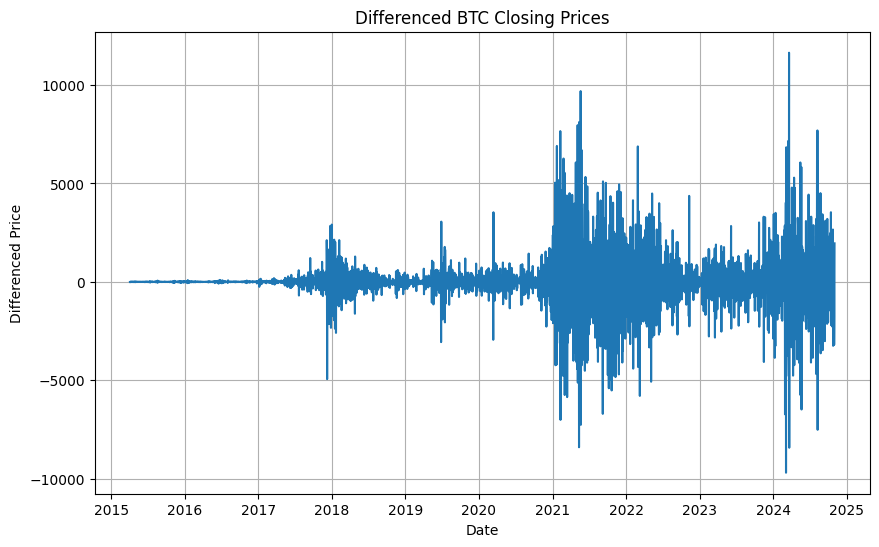

In [158]:
plt.figure(figsize=(10, 6))
plt.plot(btc['Date'], btc['Double_Diff'])
plt.title('Differenced BTC Closing Prices')
plt.xlabel('Date')
plt.ylabel('Differenced Price')
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

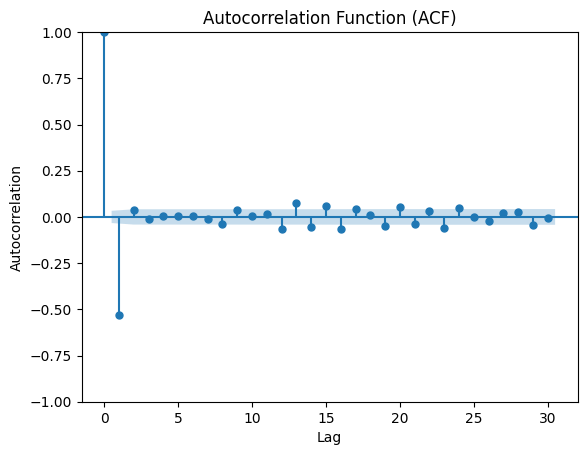

<Figure size 1200x600 with 0 Axes>

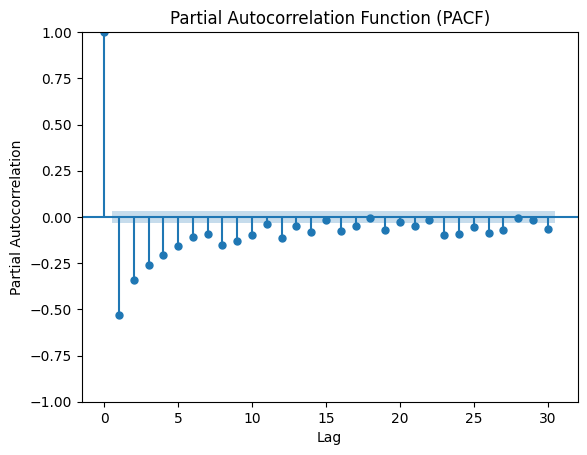

In [159]:
#plotting ACF and PACF after transforming
# 1. Plot the ACF
plt.figure(figsize=(12, 6))
plot_acf(btc['Double_Diff'], lags=30, alpha=0.05)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# 2. Plot the PACF
plt.figure(figsize=(12, 6))
plot_pacf(btc['Double_Diff'], lags=30, alpha=0.05)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [160]:

# Augmented Dickey-Fuller Test for Stationarity
def adf_test(series, title=''):
    result = adfuller(series.dropna(), autolag='AIC')
    print(f'ADF Test for {title}')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    if result[1] <= 0.05:
        print("Conclusion: The data is stationary.")
    else:
        print("Conclusion: The data is not stationary.")

# Run the ADF test on original and differenced series
adf_test(btc['Close'], title='Original data')
#adf_test(btc_forecast['Close'], title='Original Closing Prices')
#adf_test(btc_forecast['diff'], title='Differenced Closing Prices')

ADF Test for Original data
ADF Statistic: -0.618398273072997
p-value: 0.8667703437505871
Critical Values:
   1%: -3.432235920478648
   5%: -2.862373292074422
   10%: -2.5672135762276906
Conclusion: The data is not stationary.


In [161]:
adf_test(btc['Double_Diff'], title='Original data')

ADF Test for Original data
ADF Statistic: -20.25232664864779
p-value: 0.0
Critical Values:
   1%: -3.4322364645313335
   5%: -2.862373532387402
   10%: -2.567213704163575
Conclusion: The data is stationary.


In [162]:
scaler = StandardScaler()
column_to_standardize = ['Open', 'High', 'Low','Close' ]
scaler.fit(btc[column_to_standardize])

StandardScaler()

In [163]:
btc.head()

,Date,Adj Close,Close,High,Low,Open,Volume,profit,dif,Month,Daily Change (%),Year-Month,SMA50,SMA200,Year,Standardized_diff,Count Category,Double_Diff
199,2015-04-04,253.69700622558594,253.697006,255.257996,251.100006,254.291000,12493500,Loss,-0.593994,2015-04,-0.245751,2015-04,259.574362,310.84317,2015,-0.019917,Avg Return,-1.942001
200,2015-04-05,260.5979919433594,260.597992,260.674988,251.942001,253.761002,19649200,Profit,6.836990,2015-04,2.720168,2015-04,259.639901,309.85949,2015,-0.011596,Avg Return,7.525986
201,2015-04-06,255.49200439453125,255.492004,261.798004,254.574997,260.721008,20034200,Loss,-5.229004,2015-04,-1.959335,2015-04,260.053241,309.01475,2015,-0.025107,Avg Return,-12.006973
202,2015-04-07,253.17999267578125,253.179993,255.804993,252.205002,255.274002,18467400,Loss,-2.094009,2015-04,-0.904925,2015-04,260.439981,308.30667,2015,-0.021597,Avg Return,2.793976
203,2015-04-08,245.02200317382812,245.022003,253.847000,244.214996,253.063995,30086400,Loss,-8.041992,2015-04,-3.222209,2015-04,260.468221,307.48726,2015,-0.028257,Avg Return,-5.845978


In [164]:
btc.tail()

,Date,Adj Close,Close,High,Low,Open,Volume,profit,dif,Month,Daily Change (%),Year-Month,SMA50,SMA200,Year,Standardized_diff,Count Category,Double_Diff
3694,2024-10-28,69907.7578125,69907.757812,70212.265625,67535.132812,67922.671875,38799856657,Profit,1985.085938,2024-10,2.912530,2024-10,63548.888594,63262.153320,2024,2.203571,High Return,1063.859375
3695,2024-10-29,72720.4921875,72720.492188,73577.210938,69729.914062,69910.046875,58541874402,Profit,2810.445312,2024-10,4.023494,2024-10,63862.907734,63289.776445,2024,3.127777,High Return,834.273438
3696,2024-10-30,72339.5390625,72339.539062,72905.296875,71411.734375,72715.367188,40646637831,Loss,-375.828125,2024-10,-0.523859,2024-10,64156.724297,63332.366777,2024,-0.440090,Avg Return,-3193.687500
3697,2024-10-31,70215.1875,70215.187500,72662.312500,69590.500000,72335.046875,40627912076,Loss,-2119.859375,2024-10,-2.936640,2024-10,64414.164609,63354.749082,2024,-2.392989,low Return,-1743.398438
3698,2024-11-01,70047.40625,70047.406250,70362.109375,68926.414062,70202.875000,46855045120,Loss,-155.468750,2024-11,-0.238953,2024-11,64652.572500,63387.855059,2024,-0.193340,Avg Return,1956.570312


In [165]:
train_size = int(len(btc) * 0.8)
train_data = btc[:train_size]
test_data = btc[train_size:]

In [166]:
np.random.seed(42)
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from itertools import product
from statsmodels.tsa.statespace.sarimax import SARIMAX
max_p = 4
max_d = 2
max_q = 4
def find_best_aic_model(data, max_p, max_d, max_q):
    best_aic = np.inf
    best_model = None
    best_order = None
    for p, d, q in product(range(max_p + 1), range(max_d + 1), range(max_q + 1)):
        try:
            model = SARIMAX(data, order=(p, d, q), enforce_stationarity=False, enforce_invertibility=False)
            model_fit = model.fit(disp=False)
            aic = model_fit.aic
            if aic < best_aic:
                best_aic = aic
                best_model = model_fit
                best_order = (p, d, q)
        except Exception as e:
            continue
    return best_order, best_aic

best_order, best_aic = find_best_aic_model(train_data['Close'], max_p, max_d, max_q)
print("Best Order:", best_order)
print("Best AIC:", best_aic)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot

Best Order: (2, 2, 4)
Best AIC: 45436.58029824897


In [167]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2799 entries, 199 to 2997
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               2799 non-null   datetime64[ns]
 1   Adj Close          2799 non-null   object        
 2   Close              2799 non-null   float64       
 3   High               2799 non-null   float64       
 4   Low                2799 non-null   float64       
 5   Open               2799 non-null   float64       
 6   Volume             2799 non-null   object        
 7   profit             2799 non-null   object        
 8   dif                2799 non-null   float64       
 9   Month              2799 non-null   period[M]     
 10  Daily Change (%)   2799 non-null   float64       
 11  Year-Month         2799 non-null   period[M]     
 12  SMA50              2799 non-null   float64       
 13  SMA200             2799 non-null   float64       
 14  Year       

In [168]:

# Fit ARIMA model on the training dataset
model = ARIMA(train_data['Close'], order=best_order,exog = train_data[['Open', 'High', 'Low']])  # Adjust (p, d, q) based on previous analysis
model_fit = model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retv

In [169]:

# Forecast for the test period
forecast = model_fit.forecast(steps=len(test_data),exog = test_data[['Open', 'High', 'Low']])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [170]:
forecast_index = pd.date_range(start=pd.to_datetime(test_data.index[0]) + pd.Timedelta(days=1), periods=len(test_data), freq='D')

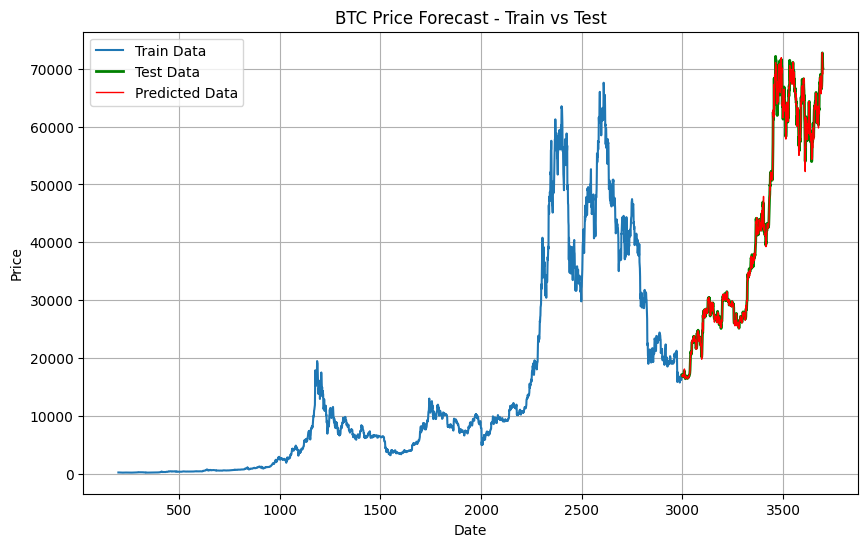

In [171]:

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['Close'], label="Train Data") # Access Close column from train_data DataFrame
plt.plot(test_data.index, test_data['Close'], label="Test Data",color = 'green',linewidth = '2')  # Access Close column from test_data DataFrame
plt.plot(test_data.index, forecast, label="Predicted Data", color='red',linewidth = '1')
plt.title("BTC Price Forecast - Train vs Test")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()


In [172]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# ... (Your existing code for ARIMA model fitting and forecasting) ...

# Evaluate the model performance
mse = mean_squared_error(test_data['Close'], forecast)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(test_data['Close'], forecast)
r2 = r2_score(test_data['Close'], forecast)  # Calculate R-squared

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 183378.23273973176
Root Mean Squared Error (RMSE): 428.22684728976503
Mean Absolute Percentage Error (MAPE): 0.67%
R-squared (R²): 0.9994217645614077


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_i

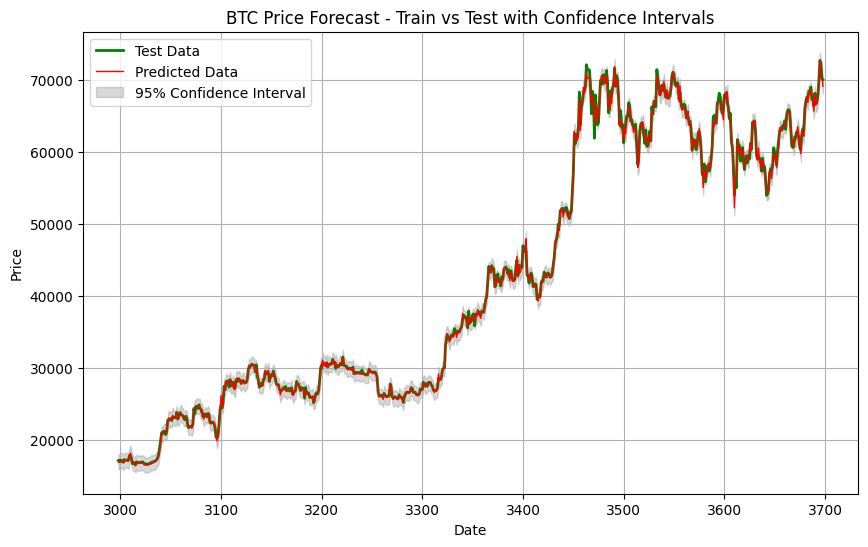

In [173]:
# Assuming best_results is an ARIMA model result
# Forecast on test data
forecast = model_fit.forecast(
    steps=len(test_data),
    exog=test_data[["Open", "High", "Low"]],  # Exogenous variables (if any)
    alpha=0.05,  # 95% confidence level
)

# Get confidence intervals separately
conf_int = model_fit.get_forecast(steps=len(test_data), exog=test_data[["Open", "High", "Low"]]).conf_int(alpha=0.05)

# Plot train, test, and forecast data
plt.figure(figsize=(10, 6))
#plt.plot(train_data.index, train_data["Close"], label="Train Data")
plt.plot(test_data.index, test_data["Close"], label="Test Data", color="green", linewidth=2)
plt.plot(test_data.index, forecast, label="Predicted Data", color="red", linewidth=1)

# Fill the confidence interval area
# Access confidence intervals using column names
plt.fill_between(
    test_data.index,
    conf_int['lower Close'],  # Lower bound of confidence interval # Changed to column name
    conf_int['upper Close'],  # Upper bound of confidence interval # Changed to column name
    color="gray",
    alpha=0.3,
    label="95% Confidence Interval",
)

# Enhance the plot
plt.title("BTC Price Forecast - Train vs Test with Confidence Intervals")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
37/37 - 7s - 197ms/step - loss: 0.0157 - val_loss: 6.4474e-04
Epoch 2/100
37/37 - 0s - 7ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 3/100
37/37 - 0s - 8ms/step - loss: 7.0793e-04 - val_loss: 6.2174e-04
Epoch 4/100
37/37 - 0s - 7ms/step - loss: 6.7745e-04 - val_loss: 6.4694e-04
Epoch 5/100
37/37 - 0s - 7ms/step - loss: 6.4933e-04 - val_loss: 6.3671e-04
Epoch 6/100
37/37 - 0s - 8ms/step - loss: 6.9732e-04 - val_loss: 4.2950e-04
Epoch 7/100
37/37 - 0s - 9ms/step - loss: 5.9891e-04 - val_loss: 4.1148e-04
Epoch 8/100
37/37 - 0s - 7ms/step - loss: 5.9342e-04 - val_loss: 9.9888e-04
Epoch 9/100
37/37 - 0s - 9ms/step - loss: 5.7121e-04 - val_loss: 4.1750e-04
Epoch 10/100
37/37 - 0s - 9ms/step - loss: 5.9442e-04 - val_loss: 3.7521e-04
Epoch 11/100
37/37 - 1s - 16ms/step - loss: 5.4989e-04 - val_loss: 0.0011
Epoch 12/100
37/37 - 0s - 9ms/step - loss: 5.9419e-04 - val_loss: 3.6994e-04
Epoch 13/100
37/37 - 0s - 6ms/step - loss: 5.4308e-04 - val_loss: 5.4283e-04
Epoch 14/100
37/37 - 

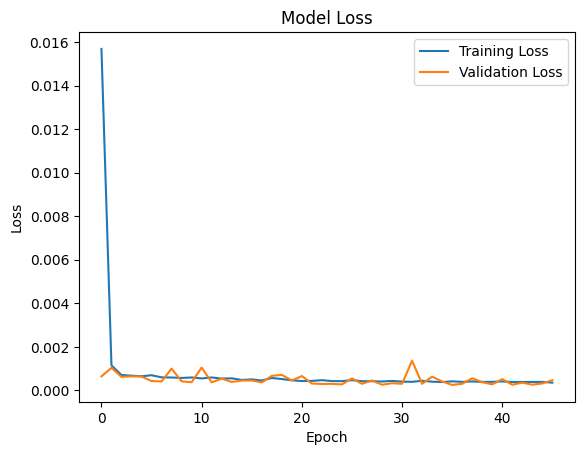

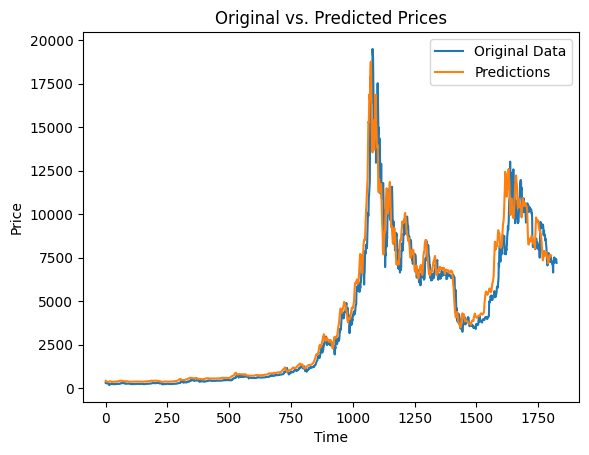

In [174]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Extracting the series
data_series = btc_forecast['Close'].values.reshape(-1, 1)

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data_series)

# Split the data into training and testing sets (adjust split ratio if needed)
train_size = int(len(data_normalized) * 0.8)  # Increased train size to 80%
test_size = len(data_normalized) - train_size
train, test = data_normalized[0:train_size], data_normalized[train_size:len(data_normalized)]

# Convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Reshape into X=t and Y=t+1 (experiment with different look_back values)
look_back = 10  # Increased look_back to 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))  # Reshaped for LSTM input
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# Define a function to create the LSTM model (to be used in hyperparameter tuning)
def create_lstm_model(units=50, activation='relu', optimizer='adam'):  # Added parameters for tuning
    model = Sequential()
    model.add(LSTM(units, activation=activation, input_shape=(look_back, 1)))  # Modified LSTM layer
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Create the LSTM model
model = create_lstm_model()  # Now using the function

# Add Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10)  # Stop if val_loss doesn't improve for 10 epochs

# Train the model (adjust epochs and batch_size)
history = model.fit(
    trainX, trainY,
    epochs=100,
    batch_size=32,  # Increased batch size
    validation_split=0.2,  # Added validation split for monitoring overfitting
    callbacks=[early_stopping],  # Added Early Stopping
    verbose=2
)

# Make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

# Invert predictions
train_predict = scaler.inverse_transform(train_predict)
trainY = scaler.inverse_transform([trainY])
test_predict = scaler.inverse_transform(test_predict)
testY = scaler.inverse_transform([testY])

# Calculate and print RMSE
train_score = np.sqrt(mean_squared_error(trainY[0], train_predict[:, 0]))
print(f'Train Score: {train_score:.2f} RMSE')
test_score = np.sqrt(mean_squared_error(testY[0], test_predict[:, 0]))
print(f'Test Score: {test_score:.2f} RMSE')

# Plot training history (loss)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot original vs predictions
plt.plot(scaler.inverse_transform(data_normalized), label='Original Data')
plt.plot(np.concatenate([train_predict, test_predict]), label='Predictions')
plt.title('Original vs. Predicted Prices')
plt.ylabel('Price')
plt.xlabel('Time')
plt.legend()
plt.show()

In [175]:
history.epoch[-1]

45

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


<ipython-input-176-2c91e5b6ab62>:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=btc_forecast['Date'].iloc[-1], periods=future_steps + 1, freq='M')[1:] # Use btc_forecast['Date'] for date range


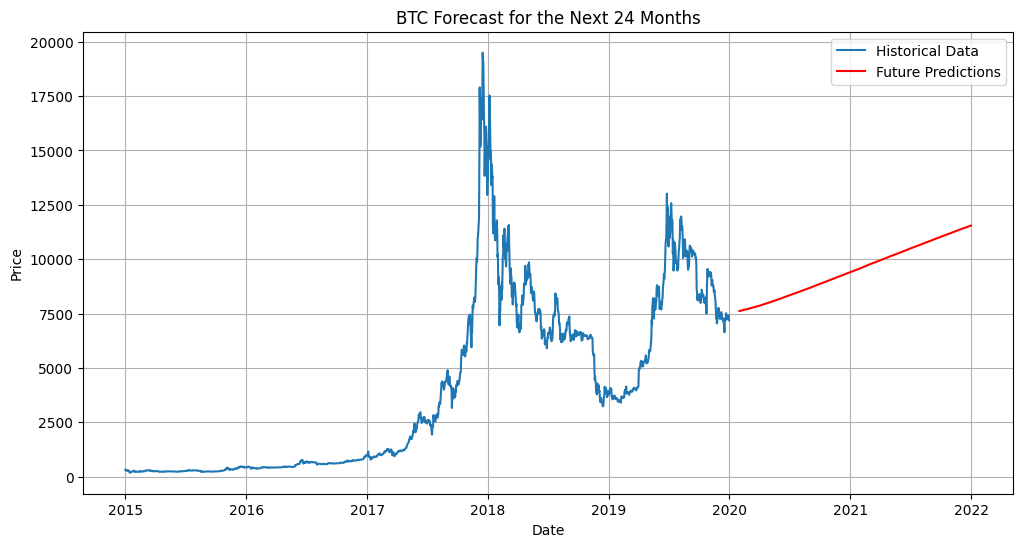

In [176]:
# Number of future months to predict
future_steps = 24

# Initialize array for storing future predictions
future_predictions = np.empty((future_steps, 1))

# Start with the last time step from your test set
current_step = testX[-1, :, :]  # Use the last time step from your test data

for i in range(future_steps):
    # Reshape input data for the model (samples, time steps, features)
    current_step_reshaped = np.reshape(current_step, (1, current_step.shape[0], 1))  # Shape: (1, look_back, 1)
    # Predict the next step
    next_step = model.predict(current_step_reshaped)
    # Store the prediction
    future_predictions[i] = next_step
    # Update the current step by appending the predicted value and removing the oldest value
    current_step = np.append(current_step[1:], next_step).reshape(-1, 1)

# Transform predictions back to the original scale
future_predictions = scaler.inverse_transform(future_predictions)

# Plot the predictions
plt.figure(figsize=(12, 6))
# Replace scaled_data with data_normalized
plt.plot(btc_forecast['Date'], scaler.inverse_transform(data_normalized), label='Historical Data')  # Historical BTC data
future_dates = pd.date_range(start=btc_forecast['Date'].iloc[-1], periods=future_steps + 1, freq='M')[1:] # Use btc_forecast['Date'] for date range
#plt.plot(btc_forecast['Date'],np.concatenate([train_predict, test_predict]), label='Predictions')
plt.plot(future_dates, future_predictions, label='Future Predictions', color='red')
plt.legend()
plt.title('BTC Forecast for the Next 24 Months')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()

In [177]:
# For evaluating future predictions
# Calculate and print RMSE, MAPE, R-squared
mse = mean_squared_error(testY[0], test_predict[:, 0])
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(testY[0], test_predict[:, 0])
r2 = r2_score(testY[0], test_predict[:, 0])  # Calculate R-squared

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 194366.31876894907
Root Mean Squared Error (RMSE): 440.8699567547658
Mean Absolute Percentage Error (MAPE): 4.79%
R-squared (R²): 0.9715373282038774


In [178]:
# Install Kaggle library
!pip install kaggle

# Make a directory for Kaggle and move the API key
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Set permissions for the API key file
!chmod 600 ~/.kaggle/kaggle.json

# Example: List datasets available on Kaggle
!kaggle datasets list

# Download the specific dataset using its identifier
!kaggle datasets download -d gauravduttakiit/bitcoin-tweets-16m-tweets-with-sentiment-tagged

!unzip bitcoin-tweets-16m-tweets-with-sentiment-tagged.zip

KeyboardInterrupt: 

In [ ]:
!unzip bitcoin-tweets-16m-tweets-with-sentiment-tagged.zip

In [ ]:
import os

# List files in the current directory
os.listdir()

# Example: Load the dataset (assuming it's a CSV file)
import pandas as pd

# Replace 'filename.csv' with the actual filename
df = pd.read_csv('/content/mbsa.csv')

# Preview the first 5 rows
df.head()


In [ ]:
df.columns

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing valuesno

df = df.dropna()


In [ ]:
sentiment_2020 = df[(df['Date'] >= '2019-01-01') & (df['Date'] < '2019-12-31')].copy()

In [ ]:
sentiment_2020.head(5)

In [ ]:
sentiment_data = df.copy()

Hypothesis
The error message "ValueError: You are trying to merge on datetime64[ns] and datetime64[ns, UTC] columns for key 'Date'. If you wish to proceed you should use pd.concat" indicates that you're attempting to merge two DataFrames (sentiment_data and btc) using the 'Date' column as the key. However, the 'Date' columns in these DataFrames have different data types: one is datetime64[ns] (naive datetime) and the other is datetime64[ns, UTC] (datetime with timezone information). Pandas cannot directly merge on columns with these mismatched datetime types.

In [ ]:
sentiment_data.info()

In [ ]:
btc = btc.copy()

In [ ]:
# Load and display data
import nltk #Import nltk before calling it
import re #Import re before calling it
from nltk.stem import WordNetLemmatizer #Import WordNetLemmatizer before calling it
from nltk.corpus import stopwords #Import stopwords before calling it
from nltk.tokenize import word_tokenize #Import word_tokenize before calling it
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
sentiment_data = pd.read_csv("/content/mbsa.csv")  # Replace with your actual data file
#btc_data = pd.read_csv("/content/btc_10yrs.csv")       # Replace with your BTC price data file


In [ ]:
# Ensure 'Date' column is in datetime format and remove timezone
sentiment_data['Date'] = pd.to_datetime(sentiment_data['Date'], errors='coerce')
btc['Date'] = pd.to_datetime(btc['Date']).dt.tz_localize(None)

# Filter for the year 2017
sentiment_data_2017 = sentiment_data[sentiment_data['Date'].dt.year == 2017].copy()
btc_data_2017 = btc[btc['Date'].dt.year == 2017].copy()

# Preprocess sentiment text
nltk.download('stopwords')
nltk.download('punkt')
# Download 'punkt_tab' data for English
nltk.download('punkt_tab')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Remove URLs, special characters, and numbers
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()

    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return " ".join(tokens)

sentiment_data_2017['Cleaned_Text'] = sentiment_data_2017['text'].apply(preprocess_text)

# Map Sentiment to numeric scores (if necessary)
sentiment_mapping = {'Positive': 1, 'Negative': -1, 'Neutral': 0}
sentiment_data_2017['Sentiment_Score'] = sentiment_data_2017['Sentiment'].map(sentiment_mapping)

# Aggregate sentiment scores by date
sentiment_agg = sentiment_data_2017.groupby('Date').agg({
    'Sentiment_Score': 'mean'
}).reset_index()

# Merge sentiment and BTC price data
merged_data_2017 = pd.merge(sentiment_agg, btc_data_2017, on='Date', how='inner')


In [ ]:
merged_data_2017 = merged_data_2017.reset_index()
merged_data_2017 = merged_data_2017.sort(by='Date',aesc = True)

In [ ]:
# Enhanced Visualization of Sentiment and BTC Price Trends
plt.figure(figsize=(14, 8))

# Plot BTC Price
sns.lineplot(data=merged_data_2017, x='Date', y='Close', label='BTC Price', color='orange', linewidth=2.5)

# Create a secondary y-axis for sentiment
ax1 = plt.gca()  # Primary y-axis (BTC Price)
ax2 = ax1.twinx()  # Secondary y-axis (Sentiment)

# Plot Sentiment Score on secondary y-axis
sns.lineplot(data=merged_data_2017, x='Date', y='Sentiment_Score', label='Sentiment Score', ax=ax2, color='blue', linewidth=2.5)

# Add markers for better readability
ax1.scatter(merged_data_2017['Date'], merged_data_2017['Close'], color='orange', s=10)
ax2.scatter(merged_data_2017['Date'], merged_data_2017['Sentiment_Score'], color='blue', s=10)

# Titles and Labels
plt.title("Sentiment and BTC Price Trends (2017)", fontsize=16, fontweight='bold')
ax1.set_xlabel("Date", fontsize=14)
ax1.set_ylabel("BTC Price (USD)", fontsize=14, color='orange')
ax2.set_ylabel("Sentiment Score", fontsize=14, color='blue')

# Grid and Legends
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend(loc='upper left', fontsize=12)
ax2.legend(loc='upper right', fontsize=12)

# Format x-axis for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:

# Create lag features for forecasting
merged_data_2017['Sentiment_Lag_1'] = merged_data_2017['Sentiment_Score'].shift(1)
merged_data_2017['Sentiment_Lag_7'] = merged_data_2017['Sentiment_Score'].shift(7)
merged_data_2017['Close_1'] = merged_data_2017['Close'].shift(1)

# Drop rows with NaN values (introduced by lagging)
merged_data_2017 = merged_data_2017.dropna(subset=['Sentiment_Lag_1', 'Sentiment_Lag_7', 'Close_lag_1'])



In [ ]:
# Prepare features (X) and target (y)
X = merged_data_2017[['Close', 'Sentiment_Lag_1', 'Sentiment_Lag_7', 'Close_1','profit/loss']]
y = merged_data_2017['Sentiment_Score']  # Replace 'Adj Close' with BTC price column name

# Convert the 'profit' column to numeric representation (e.g., 0 and 1)
X['profit'] = merged_data_2017['profit'].map({'Profit': 1, 'Loss': 0}) # Convert 'profit' column to numeric


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train.info(), X_test.info(), y_train.info(), y_test.info()

In [ ]:
# XGBoost Model
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Regression loss function
    n_estimators=100,             # Number of trees (boosting rounds)
    learning_rate=0.1,            # Step size shrinkage
    max_depth=5,                  # Maximum tree depth
    colsample_bytree=0.8,         # Subsample ratio of columns
    subsample=0.8,                # Subsample ratio of training instances
    random_state=42
)

In [ ]:
# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)


In [ ]:
y_pred

In [ ]:
# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
# Import the necessary class
from sklearn.inspection import PartialDependenceDisplay
!pip install --upgrade xgboost

In [ ]:
merged_data_2017['profit/loss'] = merged_data_2017['profit'].map({'Profit': 1, 'Loss': 0})

# 1. Feature Importance: Show how important sentiment features are
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_model, importance_type='weight', title="Feature Importance", xlabel="F Score", ylabel="Features")
plt.title("Feature Importance in BTC Price Prediction")
plt.show()

# 2. Correlation Analysis: Check correlations between features and target
correlation_matrix = merged_data_2017[['Sentiment_Score', 'Sentiment_Lag_1', 'Sentiment_Lag_7', 'Close_1', 'Close','profit/loss']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


In [ ]:
# Step 3: Actual vs. Predicted Plot
# Predict on test set
y_pred = xgb_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted")
plt.legend()
plt.grid()
plt.show()

In [ ]:
print(future_features.head())


In [ ]:
print("X_train index range:", X_train.index.min(), X_train.index.max())
print("X_test index range:", X_test.index.min(), X_test.index.max())
print("Future dates range:", future_dates.min(), future_dates.max())


In [ ]:
merged_data_2017.head()

In [ ]:
# Plot actual vs predicted prices
plt.figure(figsize=(8, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red')
plt.title("Actual vs Predicted BTC Prices (2017)")
plt.xlabel("Index")
plt.ylabel("BTC Price (Adj Close)")
plt.legend()
plt.show()

In [ ]:
merged_data_2017.head(20)

In [ ]:
merged_data_2017.info()

In [ ]:
merged_data_2017.isnull().sum()

In [ ]:
merged_data_2017.shape

In [ ]:
merged_data_2017.groupby(['Sentiment_Score','profit'])['profit'].count()

In [ ]:
mport numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from pmdarima import auto_arima

# Set seed for reproducibility
np.random.seed(42)

# Load the BTC dataset (replace with the uploaded dataset path)
btc = pd.read_csv('/content/btc_10yrs.csv')

btc = btc.loc[2:].reset_index()
btc = btc.rename(columns = {'Price':'Date'})
print(btc)
# Convert 'Date' column to datetime
btc['Date'] = pd.to_datetime(btc['Date'])

# Filter data for Bitcoin in 2019
btc_2019 = btc[(btc['Date'] >= '2019-01-01') & (btc['Date'] <= '2019-12-31')].copy()

# Ensure 'Close' column is numeric
btc_2019['Close'] = pd.to_numeric(btc_2019['Close'], errors='coerce')
btc_2019.dropna(subset=['Close'], inplace=True)

# Reset index
btc_2019.set_index('Date', inplace=True)

# Plot the filtered time series
plt.figure(figsize=(12, 6))
plt.plot(btc_2019.index,btc_2019['Close'], label='BTC Closing Prices (2019)')
plt.title('BTC Closing Prices for 2019')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

# Load the sentiment dataset (replace with the actual file path)
sentiment = pd.read_csv('/content/consolidated_coin_data.csv')

# Convert 'Date' column to datetime
sentiment['Date'] = pd.to_datetime(sentiment['Date'])

# Filter sentiment data for 2019
sentiment = sentiment[(sentiment['Date'] >= '2019-01-01') & (sentiment['Date'] <= '2019-12-31')]

sentiment['Sentiment_Score'] = sentiment['compound']

# Preprocess sentiment data (e.g., calculate daily average sentiment scores)
sentiment['Sentiment_Score'] = pd.to_numeric(sentiment['Sentiment_Score'], errors='coerce')
daily_sentiment = sentiment.groupby('Date')['Sentiment_Score'].mean().reset_index()

# Add sentiment categories
def categorize_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

daily_sentiment['Sentiment_Category'] = daily_sentiment['Sentiment_Score'].apply(categorize_sentiment)

# Merge BTC and sentiment data
btc_sentiment = btc.reset_index().merge(daily_sentiment, on='Date', how='left').fillna(0)
btc_sentiment.set_index('Date', inplace=True)

# Plot the sentiment scores
plt.figure(figsize=(12, 6))
plt.plot(btc_sentiment['Sentiment_Score'], label='Daily Sentiment Score', color='purple')
plt.title('Daily Sentiment Scores (2019)')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.grid()
plt.show()

# Check stationarity using the Augmented Dickey-Fuller test
def adf_test(series, title=''):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Test for {title}')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    if result[1] <= 0.05:
        print("Conclusion: The data is stationary.")
    else:
        print("Conclusion: The data is not stationary.")

# Run ADF test on original BTC prices
adf_test(btc_sentiment['Close'], title='Original Closing Prices')

# Log transformation and differencing for stationarity
btc_sentiment['Log_Close'] = np.log(btc_sentiment['Close'])
btc_sentiment['Diff'] = btc_sentiment['Log_Close'].diff().dropna()

# Run ADF test on differenced data
adf_test(btc_sentiment['Diff'].dropna(), title='Differenced Log Prices')

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plot_acf(btc_sentiment['Diff'].dropna(), lags=30, alpha=0.05)
plt.title('Autocorrelation Function (ACF)')
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(btc_sentiment['Diff'].dropna(), lags=30, alpha=0.05)
plt.title('Partial Autocorrelation Function (PACF)')
plt.grid()
plt.show()

# Train-test split
train_size = int(len(btc_sentiment) * 0.8)
train_data = btc_sentiment['Close'][:train_size]
test_data = btc_sentiment['Close'][train_size:]
train_sentiment = btc_sentiment['Sentiment_Score'][:train_size]
test_sentiment = btc_sentiment['Sentiment_Score'][train_size:]

# ARIMA Model with sentiment as exogenous variable
# Optimize ARIMA parameters using pmdarima
stepwise_model = auto_arima(train_data, exogenous=train_sentiment, start_p=1, start_q=1, max_p=4, max_q=4, m=1, start_P=0, seasonal=False, d=None, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
print("Optimal ARIMA order:", stepwise_model.order)

# Fit ARIMA model with optimal parameters
arima_model = ARIMA(train_data, exog=train_sentiment, order=stepwise_model.order)
arima_fit = arima_model.fit()
print(arima_fit.summary())

# Forecast the next year (365 days)
forecast = arima_fit.forecast(steps=len(test_data), exog=test_sentiment)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data', color='orange')
plt.plot(test_data.index, forecast, label='ARIMA Forecast', color='red')
plt.title('BTC Price Forecast with ARIMA and Sentiment (2019)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

# Evaluate the model performance
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(test_data, forecast)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Percentage Error: {mape * 100:.2f}%")


In [ ]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove special characters and numbers
    text = re.sub(r'\W+|\d+', ' ', text)
    # Lowercase and remove stopwords
    text = text.lower().split()
    text = [word for word in text if word not in stop_words]
    return ' '.join(text)

# Apply cleaning to the 'text' column
sentiment_2020['cleaned_text'] = sentiment_2020['text'].apply(clean_text)

# Preview the cleaned data
sentiment_2020[['text', 'cleaned_text']].head()
